In this notebook, I will demostrate **Hierarichal Algorithm** . To Prepare this notebook I have taken reference from `Krish Naik Youtube Chanel`

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Importing Iris Dataset

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Data Preprocessing

In [5]:
data = pd.DataFrame(iris.data)
data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
data.shape

(150, 4)

In [7]:
#adding columns names
data.columns = iris.feature_names

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
# split data into test train
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.2)

In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train = pd.DataFrame(sc.fit_transform(train))
test = pd.DataFrame(sc.transform(test))
train

,0,1,2,3
0,0.573085,-1.774651,0.379845,0.144490
1,1.067835,0.097508,0.551634,0.413310
2,-1.282226,0.799568,-1.223521,-1.334016
3,0.449398,0.799568,0.952476,1.488587
4,1.315210,0.097508,0.952476,1.219768
...,...,...,...,...
115,-1.158539,1.267608,-1.338047,-1.468426
116,-1.034851,-0.136512,-1.223521,-1.334016
117,-0.416414,-1.306611,0.150793,0.144490
118,-0.416414,2.671728,-1.338047,-1.334016


In [12]:
# Apply the PCA
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
pca

PCA(n_components=2)

In [15]:
train = pca.fit_transform(train)
test = pca.transform(test)
train.shape

(120, 2)

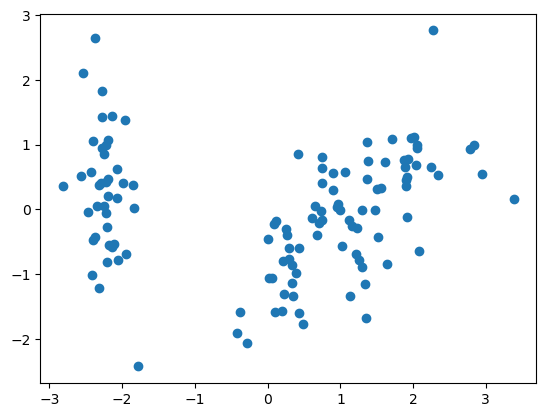

In [16]:
plt.scatter(train[:,0],train[:,1])

Text(0, 0.5, 'Eucledian Distance')

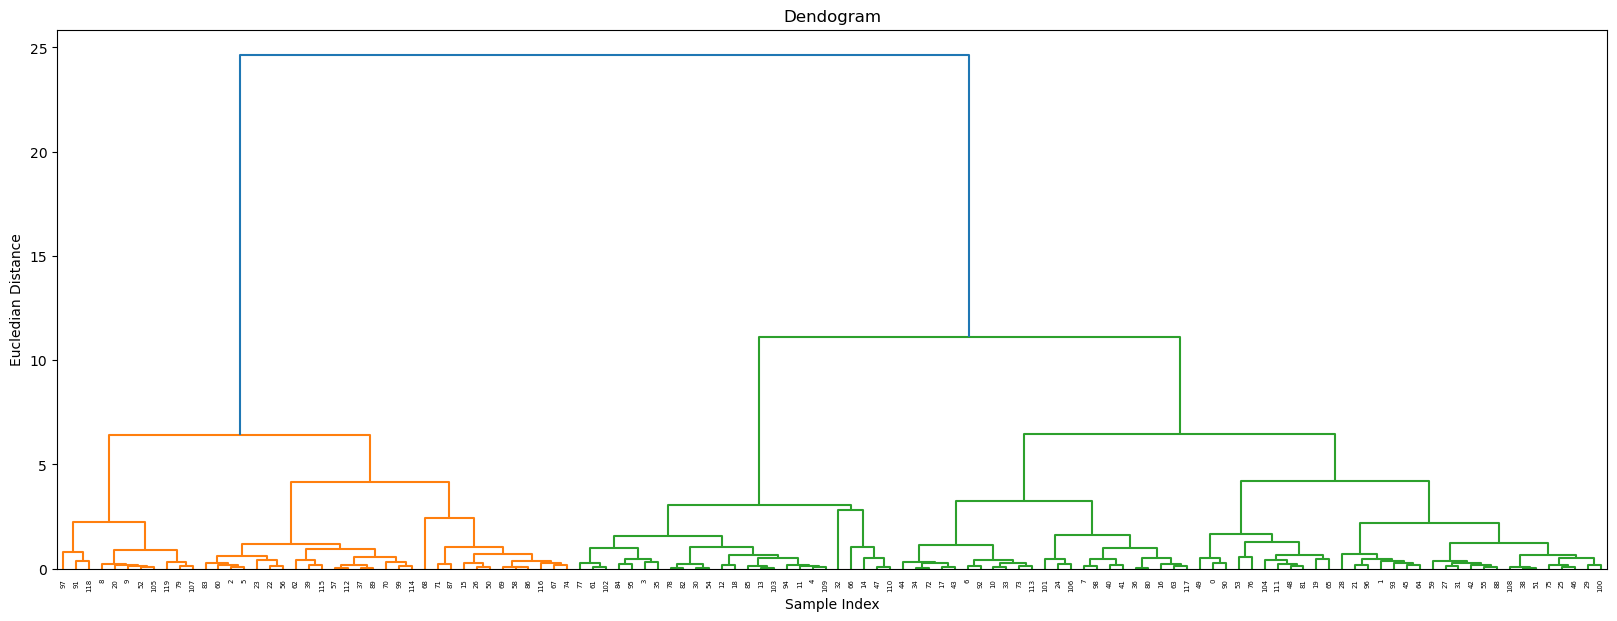

In [17]:
# Agglomerative Clustering 
## To construct a dendogram
import scipy.cluster.hierarchy as sc
# plot dendogram
plt.figure(figsize=(20,7))
plt.title("Dendogram")

# Create dendogram
sc.dendrogram(sc.linkage(train,method="ward"))
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
cluster.fit(train)

AgglomerativeClustering()

In [19]:
cluster.labels_

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

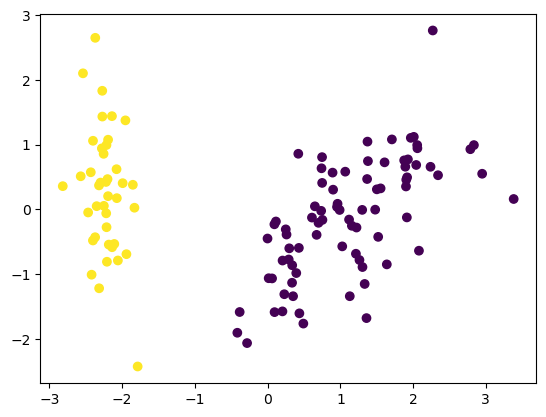

In [20]:
plt.scatter(train[:,0],train[:,1],c=cluster.labels_)

## Silhouette Score

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_coefficient = []
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="ward")
    cluster.fit(train)
    score = silhouette_score(train,cluster.labels_)
    silhouette_coefficient.append(score)

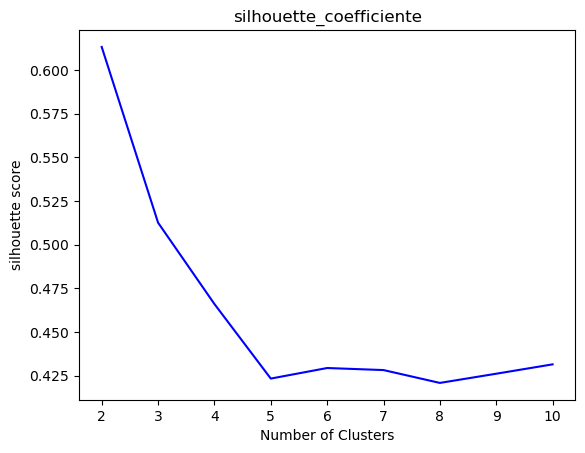

In [23]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficient,color="blue")
plt.title("silhouette_coefficiente")
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.show()

In [24]:
max(silhouette_coefficient)

0.6131629201777555

### Thank you for reading....